In [10]:
import numpy as np
import os
import argparse
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from matplotlib.collections import PatchCollection
from distinctipy import distinctipy
import math
import scipy.signal as signal
from matplotlib.colors import from_levels_and_colors
from matplotlib.colors import ListedColormap

In [35]:
def CreateMask(mask_size, open_frac):
    mask = np.zeros(mask_size**2)
    num_open = math.ceil(open_frac * (mask_size**2))

    mask[np.random.choice(mask.size, num_open, replace=False)] = 1

    mask = mask.reshape(mask_size, mask_size)
        
    return mask

def VisualizeMask(plot_mask, mask_size, open_frac):
    plot_mask = plot_mask.reshape(mask_size, mask_size)

    cmap = mpl.cm.get_cmap("binary").copy()
    cmap.set_bad(color='black')

    fig = plt.figure(figsize=(7,7), facecolor='white')
    ax = fig.gca()
    ax.axis("off")

    patches = []
    for m, row in enumerate(plot_mask):
        for n, col in enumerate(row):
            square = RegularPolygon((n, -m), numVertices=4, radius=0.67,
                                orientation=np.radians(45), edgecolor='white', linewidth=0.75, facecolor='white')
            patches.append(square)

    collection = PatchCollection(patches, match_original=True, cmap=cmap)
    collection.set_array(np.ma.masked_where(plot_mask.flatten() <= 0, plot_mask.flatten()))
    ax.add_collection(collection)

    plt.plot(np.arange(mask_size+1)-0.5, np.ones(mask_size+1)*0.5, color='black')
    plt.plot(np.arange(mask_size+1)-0.5, -np.ones(mask_size+1)*(mask_size-0.5), color='black')
    plt.plot(np.ones(mask_size+1)-1.5, -np.arange(mask_size+1)+0.5, color='black')
    plt.plot(np.ones(mask_size+1)+mask_size-1.5, -np.arange(mask_size+1)+0.5, color='black')

    ax.set_aspect('equal')
    ax.autoscale_view()
    plt.tight_layout()

#     plt.savefig(self.plots_dir+'{}_coded_mask.png'.format(sname), bbox_inches='tight')

    return fig

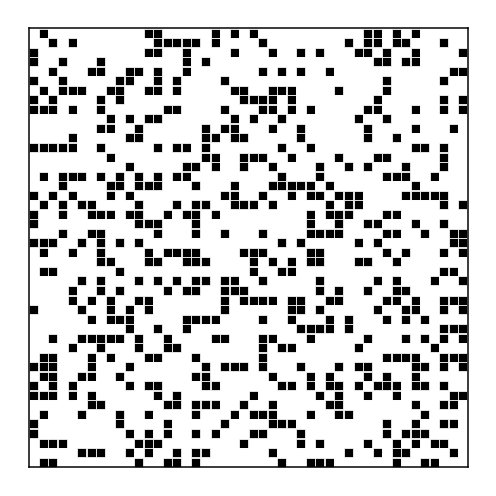

In [100]:
mask_size, open_frac = 46, 0.7
test = CreateMask(mask_size, open_frac)
fig = VisualizeMask(test, mask_size, open_frac)
plt.show()

In [889]:
import matplotlib.colors

In [19]:
# Classic Tetris blocks (4 elements)
tetris_I = np.array([[0, 0, 0, 0]])
tetris_J = np.array([[0, 1, 1],
                     [0, 0, 0]])
tetris_L = np.array([[1, 1, 0],
                     [0, 0, 0]])
tetris_O = np.array([[0, 0],
                     [0, 0]])
tetris_S = np.array([[1, 0, 0],
                     [0, 0, 1]])
tetris_T = np.array([[1, 0, 1],
                     [0, 0, 0]])
tetris_Z = np.array([[0, 0, 1],
                     [1, 0, 0]])
tetris_blocks = [tetris_I, tetris_J, tetris_L, tetris_O, tetris_S, tetris_T, tetris_Z]
tetris_blocks_names = ['I', 'J', 'L', 'O', 'S', 'T', 'Z']
tetris_block_inds = [1, 2, 3, 4, 5, 6, 7]
tetris_colors = ['#00F0F0', '#0000F0', '#F0A000', '#F0F000', '#00F000', '#A000F0', '#F00000']
tet_cmap = [mpl.colors.to_rgb(tet_col) for tet_col in tetris_colors]
tet_cmap.insert(0, (1,1,1))
# tet_cmap = ListedColormap(np.array(tet_cmap))
# Extended Tetris blocks (used in Blokus) (5 elements)
tetris_5p_1 = np.array([[0, 0, 0],
                        [0, 1, 0]])
tetris_5p_2 = np.array([[0, 0, 0, 0, 0]])
tetris_5p_3 = np.array([[0, 1, 1],
                        [0, 1, 1],
                        [0 ,0 ,0]])
tetris_5p_4 = np.array([[1, 0, 1],
                        [0, 0, 0],
                        [1, 0, 1]])
tetris_5p_5 = np.array([[0, 0, 0, 0],
                        [1, 1, 1, 0]])
tetris_5p_5r = np.array([[0, 0, 0, 0],
                         [0, 1, 1, 1]])
tetris_5p_6 = np.array([[0, 0, 0, 0],
                        [1, 1, 0, 1]])
tetris_5p_6r = np.array([[0, 0, 0, 0],
                         [1, 0, 1, 1]])
tetris_5p_7 = np.array([[1, 1, 0],
                        [0, 0, 0],
                        [0, 1, 1]])
tetris_5p_7r = np.array([[0, 1, 1],
                         [0, 0, 0],
                         [1, 1, 0]])
tetris_5p_8 = np.array([[1, 1, 0],
                        [1, 0, 0],
                        [0, 0, 1]])
tetris_5p_9 = np.array([[0, 0, 1],
                        [0, 0, 0]])
tetris_5p_9r = np.array([[0, 0, 0],
                         [0, 0, 1]])
tetris_5p_10 = np.array([[0, 1, 1],
                         [0, 0, 0],
                         [0, 1, 1]])
tetris_5p_11 = np.array([[0, 0, 1],
                         [1, 0, 0],
                         [1, 0, 1]])
tetris_5p_11r = np.array([[1, 0, 0],
                          [0, 0, 1],
                          [1, 0, 1]])
tetris_5p_12 = np.array([[1, 0],
                         [0, 0],
                         [0, 1],
                         [0, 1]])
tetris_5p_12r = np.array([[0, 1],
                          [0, 0],
                          [1, 0],
                          [1, 0]])
tetris_blocks_5 = [tetris_5p_1, tetris_5p_2, tetris_5p_3, tetris_5p_4,
                   tetris_5p_5, tetris_5p_5r, tetris_5p_6, tetris_5p_6r,
                   tetris_5p_7, tetris_5p_7r, tetris_5p_8, tetris_5p_9,
                   tetris_5p_9r, tetris_5p_10, tetris_5p_11, tetris_5p_11r,
                   tetris_5p_12, tetris_5p_12r]
tetris_blocks_5_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 
                         '11', '12', '5r', '6r', '7r', '9r', '11r', '12r']

tetris_5_colors = distinctipy.get_colors(len(tetris_blocks_5))
for t5c in tetris_5_colors:
    tet_cmap.append(t5c)
tet_cmap = ListedColormap(tet_cmap)

def choose_block(bsize, invert=False):
    if bsize == 4:
        ct = np.random.randint(len(tetris_blocks))
        block = np.rot90(tetris_blocks[ct], np.random.randint(4))
    elif bsize == 5:
        ct = np.random.randint(len(tetris_blocks_5))
        block = np.rot90(tetris_blocks_5[ct], np.random.randint(4))
    if invert:
        return (~block.astype(bool)).astype(int), ct
    return block, ct

In [1040]:
choose_block()

(array([[1, 0],
        [0, 0],
        [0, 1]]),
 6)

In [893]:
matplotlib.colors.to_rgba(tetris_colors[0])

(0.0, 0.9411764705882353, 0.9411764705882353, 1.0)

In [20]:
def valid_block_placement(mask, block, ul_corner):
    if (np.where(mask[ul_corner[0]:ul_corner[0]+block.shape[0],
                     ul_corner[1]:ul_corner[1]+block.shape[1]] == 0, 0, 1) & block).astype(bool).any():
        return False
    return True
# #             if ((mask[ul_corner[0]+row, ul_corner[1]+col] != 0) and (block[row, col] != 0)):
#             if vprint:
#                 print('Overlapping')
#             results.append(False)
# #             if ((mask[ul_corner[0]+row, ul_corner[1]+col] != 0) and (block[row, col] == 0)):
# #                 if vprint:
# #                     print('Mask 1, Block 0')
# #                 results.append(True)
# #             elif ((mask[ul_corner[0]+row, ul_corner[1]+col] == 0) and (block[row, col] == 0)):
# #                 if vprint:
# #                     print('Mask 0, Block 0')
# #                 results.append(True)
# #             elif ((mask[ul_corner[0]+row, ul_corner[1]+col] == 0) and (block[row, col] != 0)):
# #                 if vprint:
# #                     print('Mask 0, Block 1')
# #                 results.append(True)
#         else:
#             results.append(True)
#     except:
#         print('--------')
#         print('FAIL')
#         print(mask)
#         print(block)
#         print(block.shape)
#         print(ul_corner[0], ul_corner[1])
# #         print(row, col)
#         print('--------')
#     if all(results):
#         print('--------')
#         print(block)
#         print(ul_corner[0], ul_corner[1])
#         print(mask)
#         print('Block acceptable')
#     return all(results)

In [986]:
import matplotlib.gridspec as gridspec
def subplots_centered(nrows, ncols, figsize, nfigs):
    """
    Function taken from stackoverflow because I want the 3rd plot to be centered but don't want to waste time
    on just making a plot that I can already make just look a little nicer
    https://stackoverflow.com/questions/53361373/center-the-third-subplot-in-the-middle-of-second-row-python
    """

    fig = plt.figure(figsize=figsize)
    axs = []

    m = nfigs % ncols
    m = range(1, ncols+1)[-m]
    gs = gridspec.GridSpec(nrows, m*ncols)

    for i in range(0, nfigs):
        row = i // ncols
        col = i % ncols

        if row == nrows-1:
            off = int(m * (ncols - nfigs % ncols) / 2)
        else:
            off = 0

        ax = plt.subplot(gs[row, m*col + off : m*(col+1) + off])
        axs.append(ax)

    return fig, axs

In [783]:
round(((1-open_frac)*mask_size**2)/4)

3

In [882]:
frac_tetris = 1
np.linalg.solve(np.array([[4, 5], [frac_tetris, (frac_tetris-1)]]), 
    np.array([[(1-open_frac)*mask_size**2], [0]])).reshape(2,)

array([  0. , 211.6])

In [832]:
np.array([[4, 5], [frac_tetris, (frac_tetris-1)]])

array([[4. , 5. ],
       [0.4, 0.6]])

In [886]:
choose_block(True, bsize=4)

test


array([[0, 1, 0],
       [1, 1, 1]])

In [1008]:
frac_tetris = 0.8
np.linalg.solve(np.array([[5, 4], [frac_tetris, (frac_tetris-1)]]), 
                                               np.array([[(1-open_frac)*mask_size**2], [0]])).reshape(
                                                2,).astype(int)

array([ 50, 201])

In [1030]:
distinctipy.get_colors(len(tetris_blocks_5))

[(0.0, 1.0, 0.0),
 (1.0, 0.0, 1.0),
 (0.0, 0.5, 1.0),
 (1.0, 0.5, 0.0),
 (0.5, 0.75, 0.5),
 (0.3129596020547807, 0.07711630779871848, 0.6315530221912766),
 (0.7422273598484075, 0.03218489386576717, 0.09193574271662419),
 (0.020520240816072288, 0.49238398699194064, 0.17954268495632109),
 (0.8037421090114234, 0.4758854418681103, 0.966040221810231),
 (0.12155942823886068, 0.9995953899885821, 0.8992848578184548),
 (1.0, 1.0, 0.0),
 (0.9967797375847983, 0.26604871478416114, 0.5176169459919981),
 (0.5323953362005844, 0.38806331187329923, 0.28754049575825136),
 (0.0, 0.0, 1.0),
 (0.9679956798892233, 0.7536941831970412, 0.5080717105935062),
 (0.5176813686954529, 0.9062898738374938, 0.030901521301694657),
 (0.042097921739132516, 0.9714412119562962, 0.45563811827377965),
 (0.19610120417629684, 0.4409862999401032, 0.6016919636914104)]

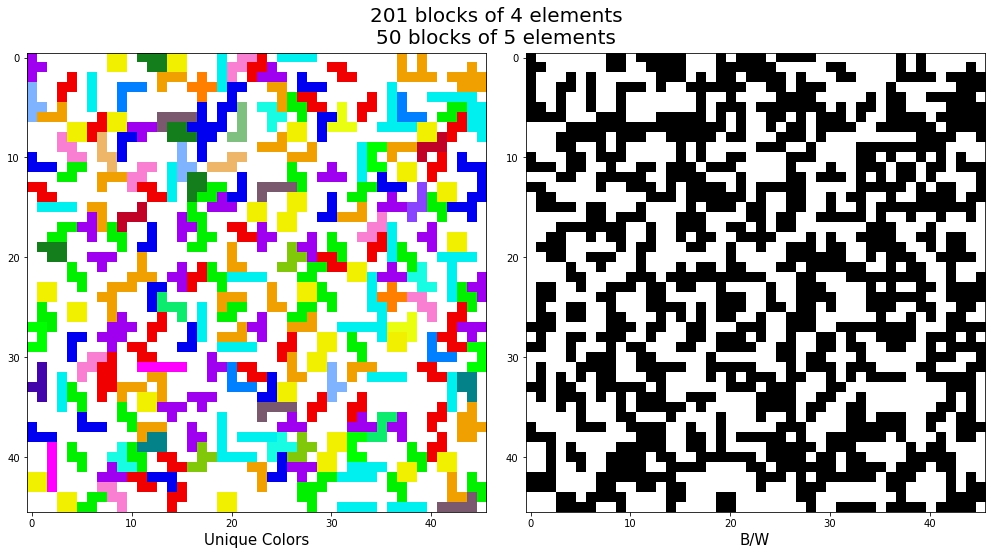

In [1041]:
mask_size = 46
open_frac = 0.5
frac_tetris = 0.8
bsize = 5
init_mask = np.zeros((mask_size, mask_size))
tetris_colors = ['#00F0F0', '#0000F0', '#F0A000', '#F0F000', '#00F000', '#A000F0', '#F00000']
exceptt = False
if frac_tetris == 1:
    tetris_needed = round(((1-open_frac)*mask_size**2)/4)
    blokus_needed = 0
    tet_cmap = [matplotlib.colors.to_rgb(tet_col) for tet_col in tetris_colors]
    tet_cmap.insert(0, (1,1,1))
elif frac_tetris == 0:
    tetris_needed = 0
    blokus_needed = round(((1-open_frac)*mask_size**2)/5)
    tet_cmap = distinctipy.get_colors(len(tetris_blocks_5))
    tet_cmap.insert(0, (1,1,1))
else:
    blokus_needed, tetris_needed = np.linalg.solve(np.array([[5, 4], [frac_tetris, (frac_tetris-1)]]), 
                                               np.array([[(1-open_frac)*mask_size**2], [0]])).reshape(
                                                2,).astype(int)
    tet_cmap = [matplotlib.colors.to_rgb(tet_col) for tet_col in tetris_colors]
    tet_cmap.insert(0, (1,1,1))
    tetris_5_colors = distinctipy.get_colors(len(tetris_blocks_5))
    for t5c in tetris_5_colors:
        tet_cmap.append(t5c)
    
tet_cmap = ListedColormap(tet_cmap)
for block_num in range(tetris_needed):
    block_needed = True
    while block_needed:
        chosen_block, block_ind = choose_block(True, bsize=4)
        c_ind = np.random.randint((np.array(init_mask.shape) - np.array(chosen_block.shape) + 1))
        if valid_block_placement(init_mask, chosen_block, c_ind):
            for row, col in np.ndindex(chosen_block.shape):
                if chosen_block[row, col] == 1:
#                     init_mask[c_ind[0]+row, c_ind[1]+col] = block_num+1
                    init_mask[c_ind[0]+row, c_ind[1]+col] = block_ind+1
            block_needed = False
for block_num_blok in range(blokus_needed):
    block_needed = True
    while block_needed:
        chosen_block, block_ind = choose_block(True, bsize=5)
        c_ind = np.random.randint((np.array(init_mask.shape) - np.array(chosen_block.shape) + 1))
        if valid_block_placement(init_mask, chosen_block, c_ind):
            for row, col in np.ndindex(chosen_block.shape):
                if chosen_block[row, col] == 1:
#                     init_mask[c_ind[0]+row, c_ind[1]+col] = block_num_blok+block_num+2
                    init_mask[c_ind[0]+row, c_ind[1]+col] = block_ind+8
            block_needed = False
            
tet_col = mpl.cm.get_cmap("winter").copy()(np.linspace(0,1,tetris_needed))
blok_col = mpl.cm.get_cmap("copper").copy()(np.linspace(0,1,blokus_needed))

custom_cmap = ListedColormap(np.vstack((np.array([[1, 1, 1, 1]]), tet_col, blok_col)))

# fig, [ax1, ax2, ax3] = subplots_centered(2, 2, (14, 14), 3)
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14,7), facecolor='white')
# im = ax1.imshow(init_mask, cmap=tet_cmap)
# im = ax1.imshow(init_mask, cmap=custom_cmap)
# ax1.set_xlabel('Grouped Colors\n(Green - Blue) = 4 elements | (Yellow - Red) = 5 elements', fontsize=15)

im = ax1.imshow(init_mask, cmap=tet_cmap)
# im = ax1.imshow(init_mask, cmap=custom_cmap)
ax1.set_xlabel('Unique Colors', fontsize=15)

cmap = mpl.cm.get_cmap("binary").copy()
im = ax2.imshow(np.where(init_mask == 0, 0, 1), cmap=cmap)
ax2.set_xlabel('B/W', fontsize=15)



plt.tight_layout()
plt.suptitle('{} blocks of 4 elements\n{} blocks of 5 elements'.format(
            tetris_needed, blokus_needed), y=1.07, fontsize=20)


# plt.savefig('Plots/Tetris-mask.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14,7), facecolor='white')
# im = ax1.imshow(init_mask, cmap=tet_cmap)
# # im = ax1.imshow(init_mask, cmap=custom_cmap)
# ax1.set_xlabel('Color (for visualization)', fontsize=15)

# cmap = mpl.cm.get_cmap("binary").copy()
# im = ax2.imshow(np.where(init_mask == 0, 0, 1), cmap=cmap)
# ax2.set_xlabel('B/W', fontsize=15)
# plt.tight_layout()
# plt.suptitle('{} blocks of 4 elements\n{} blocks of 5 elements'.format(
#             tetris_needed, blokus_needed), y=1.06, fontsize=20)
# plt.savefig('Plots/Tetris-mask-unique-col.png', dpi=300, bbox_inches='tight')
# plt.show()

In [21]:
block_colors =  {0 : np.array([255, 255, 255]),
                 1 : np.array([70, 240, 240]),
                 2 : np.array([0, 0, 240]),
                 3 : np.array([0, 0, 240]),
                 4 : np.array([240, 240, 0]),
                 5 : np.array([240, 0, 0]),
                 6 : np.array([160, 0, 240]),
                 7 : np.array([240, 0, 0]),
                 8 : np.array([128, 0, 0]),
                 9 : np.array([250, 190, 212]),
                 10: np.array([170, 110, 40]),
                 11: np.array([255, 215, 180]),
                 12: np.array([245, 130, 48]),
                 13: np.array([245, 130, 48]),
                 14: np.array([128, 128, 0]),
                 15: np.array([128, 128, 0]),
                 16: np.array([210, 245, 60]),
                 17: np.array([210, 245, 60]),
                 18: np.array([170, 255, 195]),
                 19: np.array([60, 180, 75]),
                 20: np.array([60, 180, 75]),
                 21: np.array([0, 128, 128]),
                 22: np.array([0, 130, 200]),
                 23: np.array([0, 130, 200]),
                 24: np.array([240, 50, 230]),
                 25: np.array([240, 50, 230])}

In [39]:
def Create_Tetris_Mask(mask_size, open_frac, frac_tetris, visualize=False):
    tet_mask = np.zeros((mask_size, mask_size))
    
    # Determining number of each block size needed
    if frac_tetris == 1:
        tetris_needed = round(((1-open_frac)*mask_size**2)/4)
        blokus_needed = 0
    elif frac_tetris == 0:
        tetris_needed = 0
        blokus_needed = round(((1-open_frac)*mask_size**2)/5)

    else:
        blokus_needed, tetris_needed = np.linalg.solve(np.array([[5, 4], [frac_tetris, (frac_tetris-1)]]), 
                                                   np.array([[(1-open_frac)*mask_size**2], [0]])).reshape(
                                                    2,).astype(int)
        
    # Placing tetris blocks into place
    for block_num in range(tetris_needed):
        block_needed = True
        while block_needed:
            chosen_block, block_ind = choose_block(4, True)
            c_ind = np.random.randint((np.array(tet_mask.shape) - np.array(chosen_block.shape) + 1))
            if valid_block_placement(tet_mask, chosen_block, c_ind):
                for row, col in np.ndindex(chosen_block.shape):
                    if chosen_block[row, col] == 1:
                        tet_mask[c_ind[0]+row, c_ind[1]+col] = block_ind+1
                block_needed = False
            
    # Placing blokus blocks into place
    for block_num_blok in range(blokus_needed):
        block_needed = True
        while block_needed:
            chosen_block, block_ind = choose_block(5, True)
            c_ind = np.random.randint((np.array(tet_mask.shape) - np.array(chosen_block.shape) + 1))
            if valid_block_placement(tet_mask, chosen_block, c_ind):
                for row, col in np.ndindex(chosen_block.shape):
                    if chosen_block[row, col] == 1:
                        tet_mask[c_ind[0]+row, c_ind[1]+col] = block_ind+8
                block_needed = False
                
    if visualize:
        mask_3d = np.ndarray(shape=(tet_mask.shape[0], tet_mask.shape[1], 3), dtype=int)
        for i in range(tet_mask.shape[0]):
            for j in range(tet_mask.shape[1]):
                mask_3d[i][j] = block_colors[tet_mask[i][j]]
                
        plt.figure(figsize=(7,7), dpi=200, facecolor='white')
        plt.imshow(mask_3d)
        ax = plt.gca()
        for i in range(0, tet_mask.shape[0]):
            for j in range(0, tet_mask.shape[1]):
                c = tet_mask[j,i]
                if c == 0:
                    continue
                ax.text(i, j, str(int(c)), va='center', ha='center', fontsize=(46*5)/mask_size)
        plt.title('{} blocks of 4 elements\n{} blocks of 5 elements'.format(
            tetris_needed, blokus_needed), y=1.01)
        plt.show()
    else:
        return tet_mask

In [36]:
5/46*10

1.0869565217391304

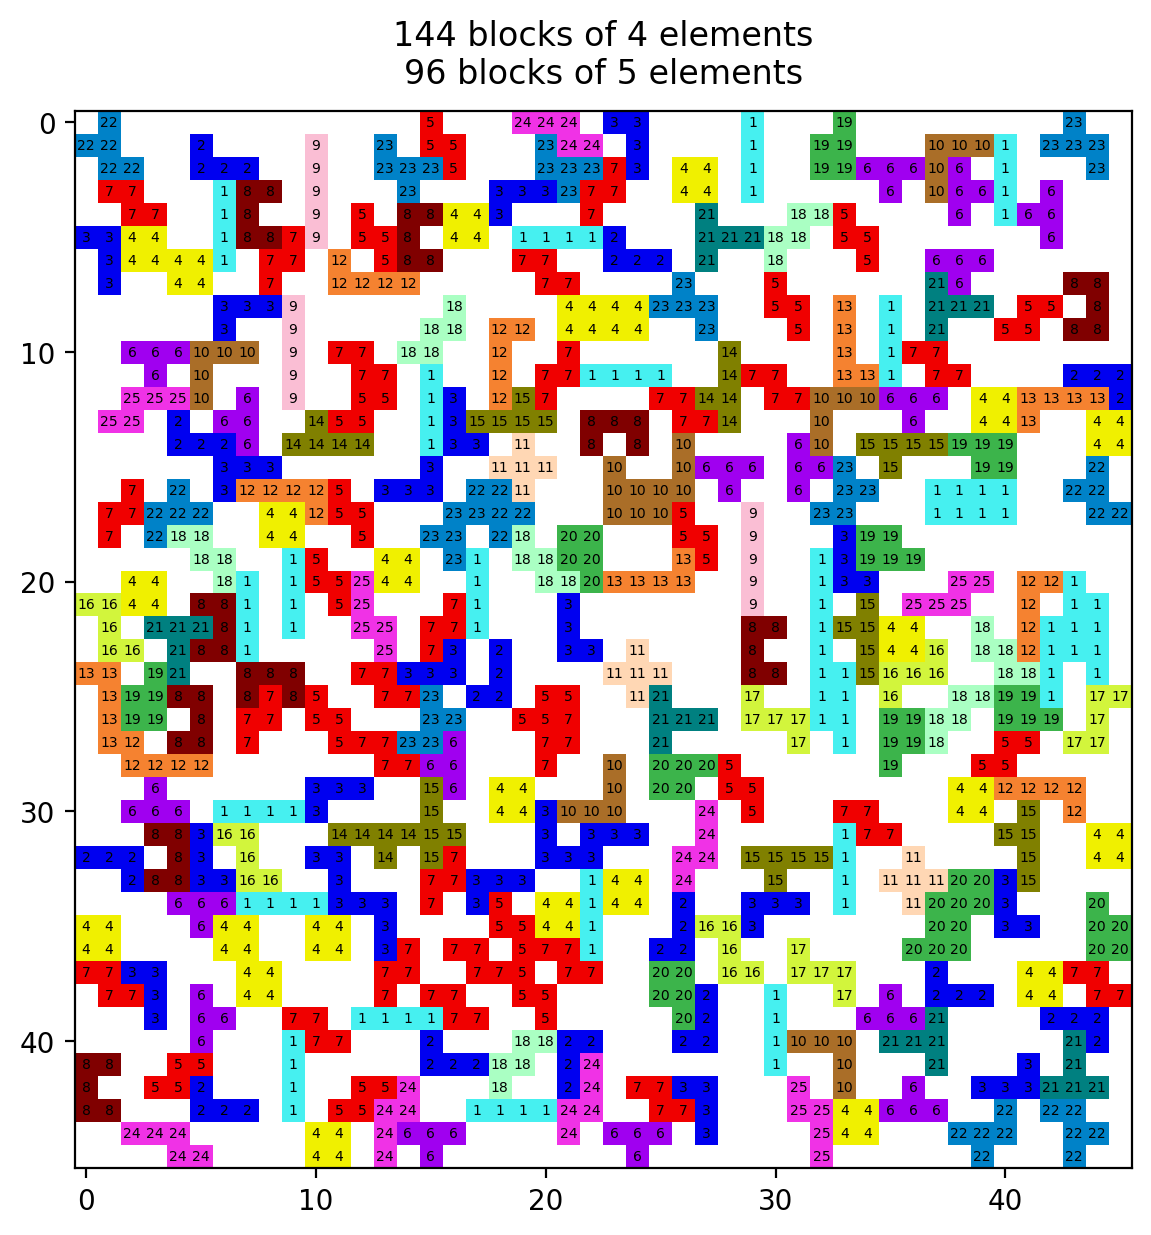

In [40]:
# np.random.seed(69)
Create_Tetris_Mask(46, 0.5, 0.6, True)

In [1052]:
data_3d = np.ndarray(shape=(init_mask.shape[0], init_mask.shape[1], 3), dtype=int)
for i in range(init_mask.shape[0]):
    for j in range(init_mask.shape[1]):
        data_3d[i][j] = block_colors[init_mask[i][j]]

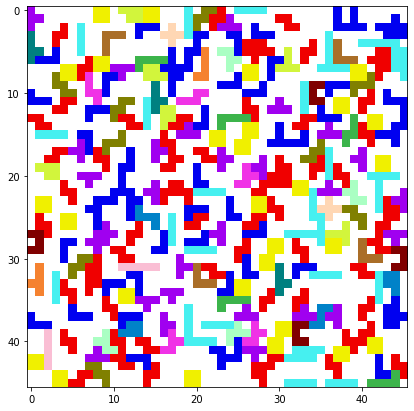

In [1056]:
plt.figure(figsize=(7,7))
plt.imshow(data_3d)

In [1045]:
Create_Tetris_Mask(10, 0.4, 0.5)

array([[ 0.,  0., 25., 25.,  0.,  2.,  0.,  0.,  0.,  0.],
       [25., 25., 25.,  0.,  0.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2.,  2.,  0.,  7.,  7.,  0.],
       [ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  7.,  7.],
       [ 6.,  6.,  7.,  0., 10.,  0.,  0.,  2., 20., 20.],
       [ 6.,  7.,  7.,  0., 10.,  0.,  2.,  2.,  0., 20.],
       [20.,  7., 10., 10., 10.,  0.,  0.,  6.,  0., 20.],
       [20.,  8.,  0.,  8.,  0., 24.,  0.,  6.,  6., 20.],
       [20.,  8.,  8.,  8., 24., 24., 24.,  6.,  0.,  0.],
       [20., 20.,  0.,  0.,  0.,  0., 24.,  0.,  0.,  0.]])

In [917]:
import distinctipy

In [932]:
colors = distinctipy.get_colors(26)

In [934]:
colors

[(0.0, 1.0, 0.0),
 (1.0, 0.0, 1.0),
 (0.0, 0.5, 1.0),
 (1.0, 0.5, 0.0),
 (0.5, 0.75, 0.5),
 (0.37498948148046884, 0.09060572825491953, 0.6079829733279646),
 (0.8170749962224527, 0.024185739684127183, 0.12906359687222668),
 (0.0, 1.0, 1.0),
 (0.9335895834320471, 0.4821786521336193, 0.8100481759306726),
 (0.1757547177674248, 0.48929077363088613, 0.010142686864006323),
 (1.0, 1.0, 0.0),
 (0.0, 0.0, 1.0),
 (0.0, 1.0, 0.5),
 (0.0, 0.5, 0.5),
 (0.5239909195591945, 0.8411240747496189, 0.00020662579882679832),
 (0.6622626827013545, 0.3632304578706156, 0.38266996517947005),
 (0.4938976813939395, 0.9025574686448693, 0.9839537552857193),
 (0.9905765899125895, 0.8024100013082641, 0.487697688465485),
 (0.5, 0.5, 1.0),
 (0.973215745343813, 0.13939129330407418, 0.5320405300572237),
 (0.5, 0.0, 1.0),
 (0.2950162095502412, 0.20353784051742108, 0.20176976626802845),
 (0.059614685207842966, 0.7371512610200955, 0.745293984871689),
 (0.1647042134112564, 0.7772024849458008, 0.23406890092949562),
 (0.6045003

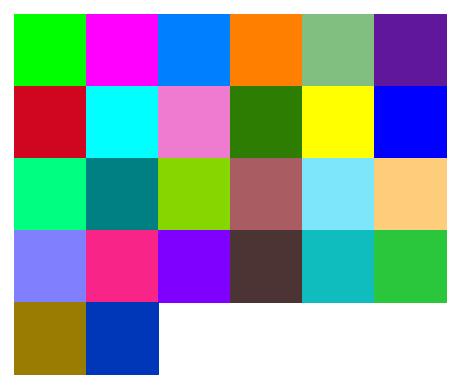

In [933]:
distinctipy.color_swatch(colors)

In [915]:
init_mask

array([[0., 0., 5., ..., 0., 4., 4.],
       [1., 5., 5., ..., 0., 4., 4.],
       [1., 0., 0., ..., 3., 4., 4.],
       ...,
       [0., 7., 7., ..., 4., 1., 1.],
       [0., 0., 7., ..., 4., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [867]:
from matplotlib.colors import ListedColormap

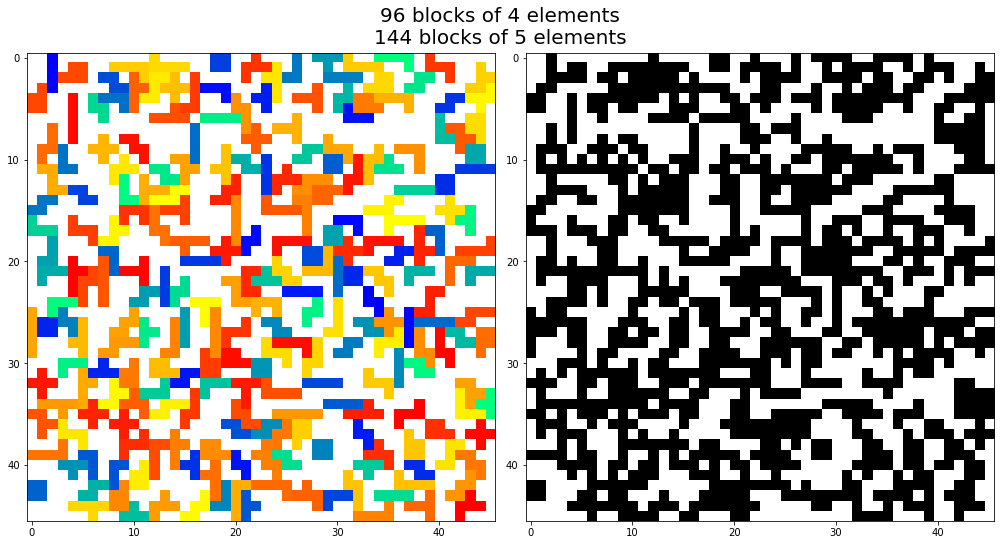

In [869]:
tet_col = mpl.cm.get_cmap("winter").copy()(np.linspace(0,1,tetris_needed))
blok_col = mpl.cm.get_cmap("autumn").copy()(np.linspace(0,1,blokus_needed))

custom_cmap = ListedColormap(np.vstack((np.array([[1, 1, 1, 1]]), tet_col, blok_col)))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14,7), facecolor='white')
im = ax1.imshow(init_mask, cmap=custom_cmap, vmin=1)

cmap = mpl.cm.get_cmap("binary").copy()
im = ax2.imshow(np.where(init_mask == 0, 0, 1), cmap=cmap)
plt.tight_layout()
plt.suptitle('{} blocks of 4 elements\n{} blocks of 5 elements'.format(
            tetris_needed, blokus_needed), y=1.06, fontsize=20)
plt.show()

In [863]:
tet_col = mpl.cm.get_cmap("winter").copy()(np.linspace(0,1,tetris_needed))
blok_col = mpl.cm.get_cmap("autumn").copy()(np.linspace(0,1,blokus_needed))

custom_cmap = np.vstack((np.array([[1, 1, 1, 1]]), tet_col, blok_col))

In [864]:
custom_cmap

array([[1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.        , 1.        , 1.        ],
       [0.        , 0.00784314, 0.99607843, 1.        ],
       [0.        , 0.01960784, 0.99019608, 1.        ],
       [0.        , 0.03137255, 0.98431373, 1.        ],
       [0.        , 0.03921569, 0.98039216, 1.        ],
       [0.        , 0.05098039, 0.9745098 , 1.        ],
       [0.        , 0.0627451 , 0.96862745, 1.        ],
       [0.        , 0.07058824, 0.96470588, 1.        ],
       [0.        , 0.08235294, 0.95882353, 1.        ],
       [0.        , 0.09411765, 0.95294118, 1.        ],
       [0.        , 0.10196078, 0.94901961, 1.        ],
       [0.        , 0.11372549, 0.94313725, 1.        ],
       [0.        , 0.1254902 , 0.9372549 , 1.        ],
       [0.        , 0.1372549 , 0.93137255, 1.        ],
       [0.        , 0.14509804, 0.92745098, 1.        ],
       [0.        , 0.15686275, 0.92156863, 1.        ],
       [0.        , 0.16862745,

In [840]:
blokus_needed

96

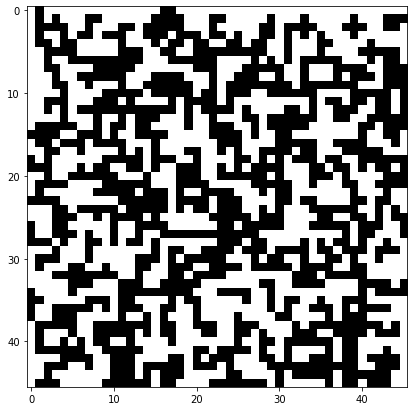

In [818]:
plt.figure(figsize=(7,7), facecolor='white')
cmap = mpl.cm.get_cmap("binary").copy()
# cmap.set_under('w')
im = plt.imshow(np.where(init_mask == 0, 0, 1), cmap=cmap)
plt.show()

In [764]:
test_mask = np.array([[0, 0, 2, 2, 2],
                      [0, 0, 2, 0, 0],
                      [0, 0, 0, 0, 1],
                      [0, 0, 1, 1, 1],
                      [0, 0, 0, 0, 0]])
test_block = np.array([[0, 1, 1], 
                       [1, 1, 0]])

In [765]:
valid_block_placement(test_mask, test_block, [0, 2], True)

UL ind, row: 0, col: 2
Overlapping


False

In [745]:
np.where(test_mask[2:4, 2:4] == 0, 0, 1) & test_block

array([[0, 1],
       [1, 1]])

In [743]:
(test_mask[2:4, 2:4] & test_block).astype(bool).any()

False

In [602]:
init_mask[c_ind[0]:c_ind[0]+chosen_block.shape[0], 
                      c_ind[1]:c_ind[1]+chosen_block.shape[1]] = (block_num+1)*chosen_block

In [640]:
test_block = (~tetris_T.astype(bool)).astype(int)

In [645]:
print(test_block)
valid_block_placement(init_mask, test_block, [7, 5], True)

[[0 1 0]
 [1 1 1]]
UL ind, row: 7, col: 5
block, row: 0, col: 0
Mask 0, Block 0
block, row: 0, col: 1
block, row: 0, col: 2
Mask 1, Block 0
block, row: 1, col: 0
Mask 0, Block 1
block, row: 1, col: 1
block, row: 1, col: 2
Mask 0, Block 1


False

In [646]:
init_mask

array([[0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [2., 2., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 3., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 4., 4., 0., 0.],
       [0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [596]:
test_chosen_block = choose_block(True)
c_ind = np.random.randint((np.array(init_mask.shape) - np.array(test_chosen_block.shape) + 1))
valid_block_placement(init_mask, test_chosen_block, c_ind)

False

In [587]:
print(test_chosen_block.shape)
np.array(init_mask.shape) - np.array(test_chosen_block.shape) + 1

(2, 3)


array([9, 8])

In [506]:
print(c_ind)
test_chosen_block

[0 8]


array([[1, 1, 1],
       [0, 1, 0]])

In [504]:
valid_block_placement(init_mask, test_chosen_block, c_ind)

IndexError: index 10 is out of bounds for axis 1 with size 10

In [431]:
test_chosen_block

array([[1, 1, 1, 1]])

In [320]:
np.array(init_mask.shape) - np.array(cbs) - 1

array([5, 8])

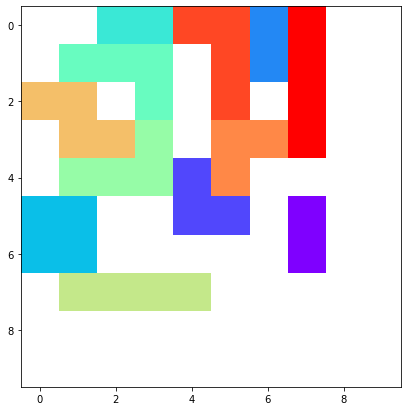

In [330]:
plt.figure(figsize=(7,7))
cmap = mpl.cm.get_cmap("rainbow").copy()
cmap.set_under('w')
im = plt.imshow(init_mask, cmap=cmap, vmin=1)
plt.show()

In [236]:
np.random.randint(np.array(init_mask.shape) - np.array(cbs))

array([7, 0])

In [222]:
cbs

(2, 3)

In [213]:
chosen_block = choose_block(True)

for row, col in np.ndindex(chosen_block.shape):
    print(row, col)

0 0
0 1
1 0
1 1
2 0
2 1


In [208]:
mask_size = 10
init_mask = np.zeros((mask_size, mask_size))

chosen_block = choose_block(True)
cbs = chosen_block.shape # Chosen block shape
init_mask[0:0+cbs[0], 0:0+cbs[1]] = chosen_block

chosen_block = choose_block(True)
cbs = chosen_block.shape # Chosen block shape
init_mask[5:5+cbs[0], 5:5+cbs[1]] = 2*chosen_block

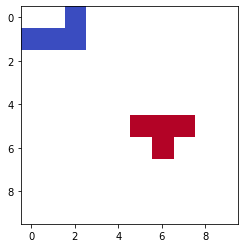

In [209]:
cmap = mpl.cm.get_cmap("coolwarm").copy()
cmap.set_under('w')
im = plt.imshow(init_mask, cmap=cmap, vmin=1)

In [182]:
init_mask[5:5+cbs[0], 5:5+cbs[1]] 

array([[2., 2., 2.],
       [2., 0., 0.]])

In [181]:
2*chosen_block

array([[2, 2, 2],
       [2, 0, 0]])

In [174]:
cbs

(1, 4)

In [177]:
init_mask[0:0+cbs[0], 0:0+cbs[1]]

array([[1., 1., 1., 1.]])

In [1]:
from optimize import *

In [2]:
test = OptimizerClass(tetrisify=True, balanced=False, frac_tetris=0.6, open_frac=0.6)

Saved Initial aperture mask image


In [41]:
test.mask

array([[ 0.,  0., 17., ...,  0.,  0.,  0.],
       [ 0.,  0., 17., ...,  0.,  0.,  0.],
       [ 0., 17., 17., ...,  7.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2.,  2.,  0.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [38]:
test.block_assigns[test.mask_tet_el[0][2]]

17

In [9]:
test.tetris_needed

114

In [10]:
test.frac_tetris

0.59375

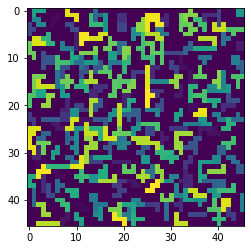

In [4]:
plt.imshow(test.mask_tet_el)

In [14]:
temp_mask = np.where(test.mask_tet_el == 66, 0, test.mask_tet_el)

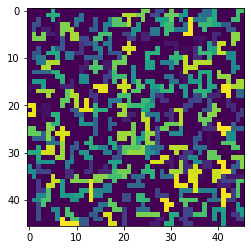

In [15]:
plt.imshow(temp_mask)

In [14]:
test.block_assigns

{1: 6,
 2: 100,
 3: 4,
 4: 1,
 5: 4,
 6: 3,
 7: 1,
 8: 4,
 9: 4,
 10: 7,
 11: 7,
 12: 5,
 13: 6,
 14: 2,
 15: 4,
 16: 7,
 17: 4,
 18: 5,
 19: 6,
 20: 4,
 21: 2,
 22: 1,
 23: 3,
 24: 2,
 25: 4,
 26: 2,
 27: 6,
 28: 2,
 29: 2,
 30: 6,
 31: 7,
 32: 1,
 33: 5,
 34: 6,
 35: 1,
 36: 3,
 37: 5,
 38: 2,
 39: 6,
 40: 7,
 41: 7,
 42: 1,
 43: 6,
 44: 6,
 45: 7,
 46: 4,
 47: 1,
 48: 3,
 49: 4,
 50: 4,
 51: 4,
 52: 3,
 53: 2,
 54: 5,
 55: 1,
 56: 2,
 57: 2,
 58: 6,
 59: 1,
 60: 4,
 61: 7,
 62: 4,
 63: 4,
 64: 6,
 65: 2,
 66: 6,
 67: 6,
 68: 5,
 69: 3,
 70: 6,
 71: 4,
 72: 7,
 73: 3,
 74: 1,
 75: 3,
 76: 1,
 77: 6,
 78: 6,
 79: 1,
 80: 4,
 81: 1,
 82: 7,
 83: 1,
 84: 6,
 85: 7,
 86: 6,
 87: 2,
 88: 1,
 89: 1,
 90: 7,
 91: 6,
 92: 6,
 93: 1,
 94: 4,
 95: 5,
 96: 3,
 97: 1,
 98: 3,
 99: 7,
 100: 1,
 101: 3,
 102: 2,
 103: 7,
 104: 6,
 105: 4,
 106: 5,
 107: 2,
 108: 2,
 109: 4,
 110: 6,
 111: 4,
 112: 7,
 113: 1,
 114: 7,
 115: 12,
 116: 12,
 117: 14,
 118: 20,
 119: 8,
 120: 14,
 121: 12,
 122: 15,
 

In [13]:
test.block_assigns[2] = 100

In [31]:
max(np.array(list(test.block_assigns.items()))[:,1])

25

In [11]:
list(test.block_assigns.keys())[-1]

240

In [22]:
block_ind_rem = np.random.randint(1, list(test.block_assigns.keys())[-1]+1) 
temp_mask = np.where(test.mask_tet_el == block_ind_rem, 0, test.mask_tet_el)
block_rem = total_blocks[test.block_assigns[block_ind_rem]-1] # only care about if not floating block types

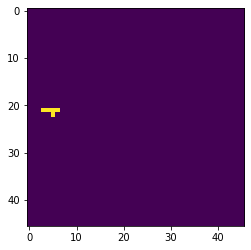

In [23]:
plt.imshow(test.mask_tet_el-temp_mask)

In [35]:
for ind in np.argwhere(test.mask_tet_el == block_ind_rem):
    print(test.mask[ind[0], ind[1]])

14.0
14.0
14.0
14.0
14.0


In [18]:
test.block_assigns[100]-1

0

In [17]:
total_blocks[test.block_assigns[100]-1]

array([[0, 0, 0, 0]])

In [14]:
test.total_blocks[test.block_assigns[100]-1]

array([[1, 1, 0],
       [0, 0, 0]])

In [29]:
block_ind_rem

131

In [12]:
4 + int(test.block_assigns[block_swap_ind]-1 > 6)

5

In [12]:
testing_mask = test.mask_tet_el.copy()

In [3]:
def swap_tetris(test):
    # test is the replacement for self for now
    block_swap_ind = np.random.randint(1, list(test.block_assigns.keys())[-1]+1) 
    temp_mask = np.where(test.mask == block_swap_ind, 0, test.mask)
#     temp_mask = test.mask.copy()
#     for swap_ind in np.argwhere(test.mask_tet_el == block_swap_ind):
#         temp_mask[swap_ind[0], swap_ind[1]] = 0
    
    block_size = 4 + int(test.block_assigns[block_swap_ind]-1 > 6)
    if test.static_blocks:
        block_2_place = (~(test.total_blocks[test.block_assigns[block_swap_ind]-1]).astype(bool)).astype(int)
        block_ind = test.block_assigns[block_swap_ind]-1
    
    block_needed = True
    while block_needed:
        if test.static_blocks:
            block_2_place = np.rot90(block_2_place, np.random.randint(4))
        else:
            block_2_place, block_ind = test.choose_block(block_size, True)
        c_ind = np.random.randint((np.array(temp_mask.shape) - np.array(block_2_place.shape) + 1))
        if test.valid_block_placement(temp_mask, block_2_place, c_ind):
            for row, col in np.ndindex(block_2_place.shape):
                if block_2_place[row, col] == 1:
#                     temp_mask[c_ind[0]+row, c_ind[1]+col] = block_ind+1
                    temp_mask[c_ind[0]+row, c_ind[1]+col] = block_swap_ind
#                     block_assigns[block_num+1] = block_ind+1
            block_needed = False
    
    return temp_mask.copy(), block_swap_ind, block_ind

In [7]:
temp_mask, bsi, bi = swap_tetris(test)

In [5]:
bsi

24

[Text(1, -126.0, 'Block Removed'),
 Text(1, 0.0, 'No Change'),
 Text(1, 126.0, 'Block Added')]

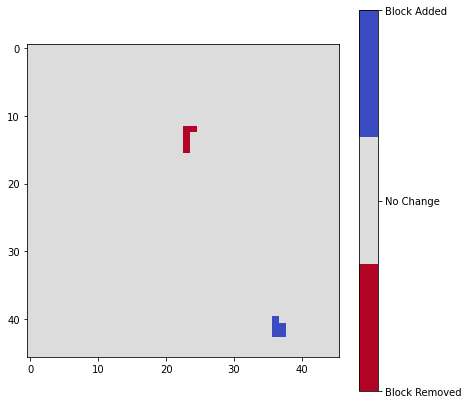

In [37]:
test.static_blocks = False
temp_mask, bsi, bi = swap_tetris(test)

plt.figure(figsize=(7, 7), facecolor='white')
cmap = plt.cm.get_cmap('coolwarm_r', 3)
plt.imshow(temp_mask-test.mask, cmap)
cbar = plt.colorbar(ticks=(np.min(temp_mask-test.mask), 0, np.max(temp_mask-test.mask)))
cbar.ax.set_yticklabels(['Block Removed', 'No Change', 'Block Added'])

In [53]:
test.mask

array([[ 0.,  0., 17., ...,  0.,  0.,  0.],
       [ 0.,  0., 17., ...,  0.,  0.,  0.],
       [ 0., 17., 17., ...,  7.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2.,  2.,  0.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [54]:
temp_mask

array([[ 0.,  0., 17., ...,  0.,  0.,  0.],
       [ 0.,  0., 17., ...,  0.,  0.,  0.],
       [ 0., 17., 17., ...,  7.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2.,  2.,  0.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [39]:
np.save('test_block_assigns.npy', test.block_assigns)

In [48]:
tem = np.load('test_block_assigns.npy', allow_pickle=True).item()

In [50]:
tem[0]

0

In [7]:
test.static_blocks = False

In [8]:
new_mask, i1, i2 = test.swap_tetris()

In [9]:
test.block_assigns[i1] = i2+1

In [10]:
test.VisualizeTetrisMask(new_mask, 'test_swap_2')

In [70]:
np.array([[b, list(test.block_assigns.values()).count(b)] for b in range(1, len(test.total_blocks)+1)])

array([[ 1,  9],
       [ 2, 11],
       [ 3,  9],
       [ 4,  9],
       [ 5,  8],
       [ 6,  7],
       [ 7,  8],
       [ 8,  5],
       [ 9,  4],
       [10,  2],
       [11,  0],
       [12,  3],
       [13,  2],
       [14,  3],
       [15,  5],
       [16,  0],
       [17,  3],
       [18,  1],
       [19,  2],
       [20,  4],
       [21,  1],
       [22,  4],
       [23,  0],
       [24,  2],
       [25,  1]])

In [35]:
order_blocks = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 6, 6, 0, 0, 4, 4, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 6, 0, 0, 0, 4, 4, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 9, 0, 0, 0,13, 0, 0, 0,24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,14, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 9, 0, 0, 0,13, 0, 0, 0,24, 0, 0,19, 0, 0, 0, 8, 8, 0, 0,14,14, 0, 0, 0,21, 0, 0, 0],
    [0, 0, 9, 0, 0, 0,13, 0, 0,24,24, 0, 0,19,19, 0, 0, 0, 8, 0, 0,14, 0, 0, 0, 0,21, 0, 0, 0],
    [0, 0, 9, 0, 0,13,13, 0, 0,24, 0, 0, 0,19,19, 0, 0, 8, 8, 0, 0,14, 0, 0, 0,21,21,21, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0,10, 0, 0, 0, 0,18,18, 0, 0, 0,16, 0, 0, 0, 0,22, 0, 0, 0, 0, 0,11, 0, 0, 0, 0],
    [0, 0, 0, 0,10, 0, 0, 0, 0, 0,18,18, 0, 0,16,16,16, 0, 0,22,22,22, 0, 0,11,11,11, 0, 0, 0],
    [0, 0, 0, 0,10,10,10, 0, 0, 0, 0,18, 0, 0, 0, 0,16, 0, 0, 0,22, 0, 0, 0, 0,11, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    ])

order_3d = np.ndarray(shape=(order_blocks.shape[0], order_blocks.shape[1], 3), dtype=int)
for i in range(order_blocks.shape[0]):
    for j in range(order_blocks.shape[1]):
        order_3d[i][j] = test.block_colors[order_blocks[i][j]]

In [66]:
text_place = {1: [6, 0.75], 2: [9.5, 0.75], 6: [13.5, 0.75], 4: [17.5, 0.75], 5: [22, 0.75],
              9: [2, 6.75], 13: [5.5, 6.75], 24: [9.5, 6.75], 19: [13.5, 6.75],
              8: [17.5, 6.75], 14: [21.5, 6.75], 21: [26, 6.75],
              10: [5, 13.75], 18: [10, 13.75], 16: [15, 13.75], 22: [20, 13.75], 11: [25, 13.75]}

In [83]:
block_quan = {b:list(test.block_assigns.values()).count(b) for b in range(1,len(test.total_blocks)+1)}

# Summing mirror blocks
block_mirrors = ([5, 7], [12, 13], [14, 15], [16, 17], [19, 20], [22, 23], [24, 25])
for bm in block_mirrors:
    block_quan[bm[0]] += block_quan[bm[1]]

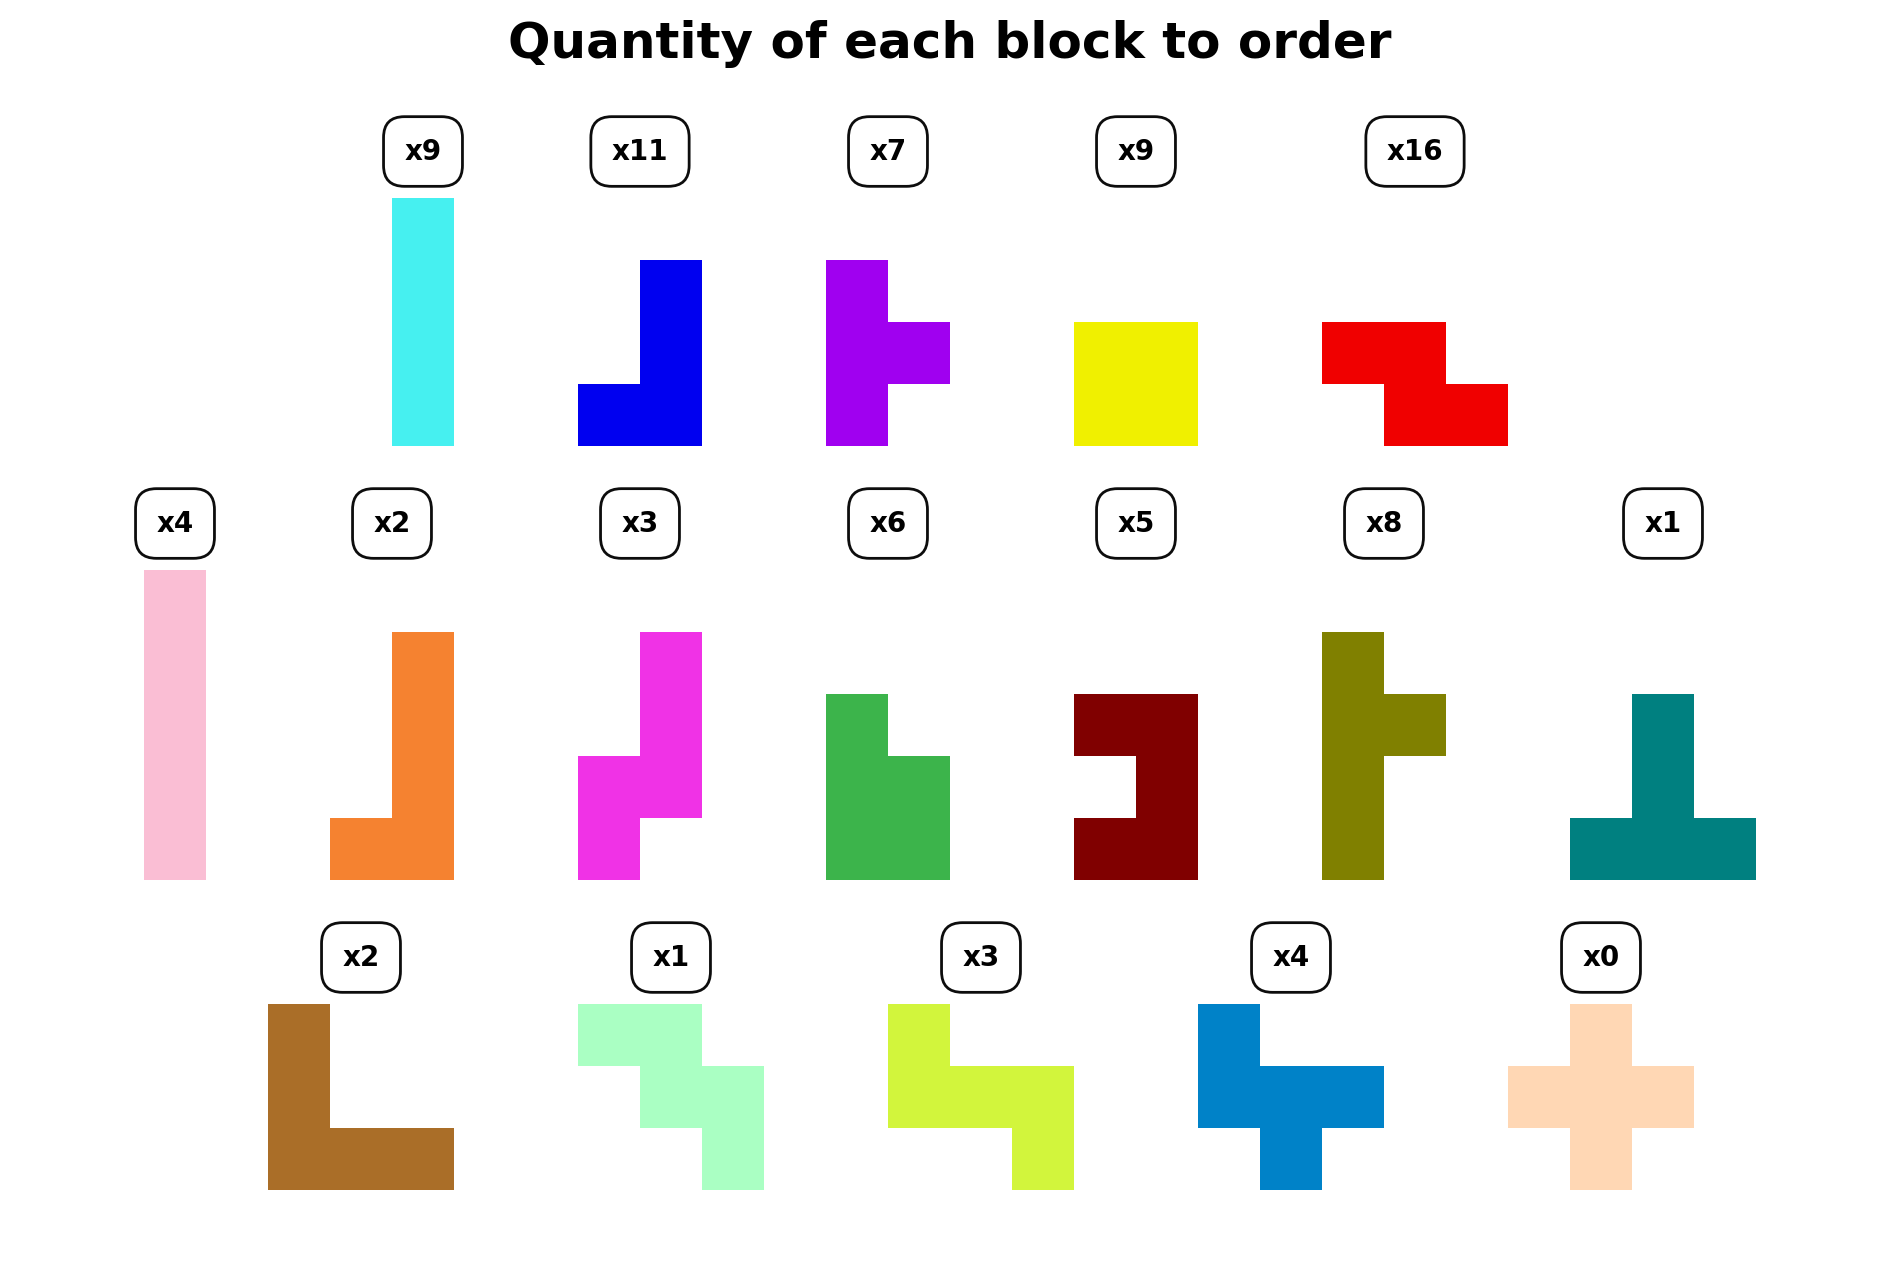

In [85]:
num = 100

plt.figure(figsize=(12,10), facecolor='white', dpi=200)
ax = plt.gca()
plt.imshow(order_3d)
ax.axis('off')
for key in text_place:
    ax.text(text_place[key][0], text_place[key][1], 'x{}'.format(block_quan[key]), va='center', ha='center', weight='bold',
            bbox=dict(facecolor='white', alpha=0.95, edgecolor='black', boxstyle='round,pad=0.75'))
plt.title('Quantity of each block to order', fontsize=18, weight='bold')
plt.show()

In [ ]:
ax.text(2.5, 6, str(int(c)), va='center', ha='center') #, fontsize=(46*5)/mask_size)

In [55]:
np.argwhere(order_blocks==9)

array([[ 8,  2],
       [ 9,  2],
       [10,  2],
       [11,  2],
       [12,  2]])

In [1]:
test = OptimizerClass(tetrisify=True, balanced=False, frac_tetris=0.6, open_frac=0.5)

NameError: name 'OptimizerClass' is not defined

In [108]:
test.frac_tetris

0.5916666666666667

In [2]:
from optimize import *

In [17]:
test = OptimizerClass(tetrisify=True, balanced=False, frac_tetris=0.6, seed=1,
                      open_frac=0.5, stopItr=1, mask_size=30, label_blocks=True)

In [19]:
test_b = np.array(list(test.block_assigns.values()))

In [20]:
test_b

array([ 0,  6,  2,  1,  6,  3,  5,  6,  2,  7,  1,  1,  3,  4,  2,  2,  5,
        2,  3,  6,  2,  2,  1,  5,  5,  6,  4,  6,  3,  2,  1,  3,  3,  2,
        3,  7,  3,  3,  2,  4,  4,  6,  2,  1,  4,  7,  6,  5,  6,  5,  4,
        4,  1,  2,  5,  7,  1,  4,  5,  2,  1, 15, 24, 17, 21, 24, 19, 24,
       22, 11, 12, 15,  8, 20, 20, 15, 21, 25, 19, 10,  8, 12,  9, 18, 19,
       20, 20, 22, 15,  8, 22,  9, 16, 17, 14, 15, 17, 17, 22,  9, 14, 10,
       23])

In [21]:
test.GreatDeluge()

Improvement on itr: 1
----------------------------------
Improvement on itr: 2
----------------------------------
Improvement on itr: 3
----------------------------------
Improvement on itr: 4
----------------------------------
Improvement on itr: 5
----------------------------------
Improvement on itr: 6
----------------------------------
Improvement on itr: 7
----------------------------------
Improvement on itr: 8
----------------------------------
Improvement on itr: 9
----------------------------------
Improvement on itr: 10
----------------------------------
Improvement on itr: 11
----------------------------------
Improvement on itr: 12
----------------------------------
Improvement on itr: 13
----------------------------------
Improvement on itr: 14
----------------------------------
Improvement on itr: 15
----------------------------------
Improvement on itr: 16
----------------------------------
Improvement on itr: 17
----------------------------------
Improvement on itr: 18


In [22]:
test_b2 = np.array(list(test.block_assigns.values()))

In [23]:
test_b

array([ 0,  6,  2,  1,  6,  3,  5,  6,  2,  7,  1,  1,  3,  4,  2,  2,  5,
        2,  3,  6,  2,  2,  1,  5,  5,  6,  4,  6,  3,  2,  1,  3,  3,  2,
        3,  7,  3,  3,  2,  4,  4,  6,  2,  1,  4,  7,  6,  5,  6,  5,  4,
        4,  1,  2,  5,  7,  1,  4,  5,  2,  1, 15, 24, 17, 21, 24, 19, 24,
       22, 11, 12, 15,  8, 20, 20, 15, 21, 25, 19, 10,  8, 12,  9, 18, 19,
       20, 20, 22, 15,  8, 22,  9, 16, 17, 14, 15, 17, 17, 22,  9, 14, 10,
       23])

In [24]:
test_b2

array([ 0,  6,  2,  1,  6,  3,  5,  6,  2,  7,  1,  1,  7,  4,  2,  2,  5,
        2,  3,  4,  6,  3,  1,  5,  5,  6,  4,  6,  3,  2,  1,  3,  3,  2,
        4,  7,  3,  3,  7,  5,  4,  6,  2,  1,  4,  7,  3,  5,  1,  5,  4,
        4,  1,  2,  5,  7,  7,  4,  7,  2,  1, 13, 24, 17,  8, 24, 19,  8,
       22,  2, 12, 15,  8, 20, 20, 15, 21, 25, 19, 10,  8, 12,  9, 18, 13,
       20, 20, 22, 15,  8, 22,  9, 15,  9, 14, 15, 17, 17, 22,  9, 14, 12,
       14])

In [12]:
np.array(list(test.min_block_assigns.values()))

array([ 0,  6,  5,  4,  2,  7,  6,  5,  6,  1,  6,  5,  2,  1,  4,  5,  6,
        2,  1,  7,  4,  1,  2,  4,  2,  3,  3,  6,  5,  4,  2,  6,  3,  2,
        7,  1,  2,  1,  7,  1,  7,  5,  4,  4,  2,  2,  7,  2,  6,  2,  3,
        3,  5,  4,  2,  5,  3,  3,  7,  3,  1, 22, 15, 25, 18, 16, 10, 13,
       12, 14, 23, 13,  7, 23, 18, 15, 23, 14,  8, 15, 12, 11, 23, 23,  9,
       10, 20, 23,  5, 22,  9, 18,  8, 15, 23,  8, 10, 17, 23, 23, 10, 17,
       15])

In [13]:
np.array(list(test.block_assigns.values()))

array([ 0,  6,  5,  7,  2,  7,  6,  5,  6,  5,  5,  5,  7,  2,  4,  5,  6,
        2,  5,  7,  4,  1,  4,  4,  2,  3,  3,  5,  5,  6,  2,  6,  3,  1,
        7,  1,  4,  1,  6,  1,  7,  5,  4,  7,  2,  2,  7,  6,  6,  2,  3,
        3,  5,  4,  2,  5,  3,  3,  7,  3,  1, 22, 15,  5, 18,  2, 13, 13,
       12, 14, 23, 13,  7, 23, 18, 15, 23, 14, 15,  1, 12, 14, 23, 16,  9,
       10, 20,  4,  5, 22,  9,  3,  8, 15, 23,  8, 10, 17, 10,  5, 10, 17,
       15])

In [16]:
np.argwhere(test.min_mask==3)

array([[14,  4],
       [14,  5],
       [15,  4],
       [15,  5]])

In [26]:
tass = {0: 0, 2: 1, 1: 2}

In [25]:
test.block_assigns

{0: 0,
 1: 6,
 2: 2,
 3: 1,
 4: 6,
 5: 3,
 6: 5,
 7: 6,
 8: 2,
 9: 7,
 10: 1,
 11: 1,
 12: 7,
 13: 4,
 14: 2,
 15: 2,
 16: 5,
 17: 2,
 18: 3,
 19: 4,
 20: 6,
 21: 3,
 22: 1,
 23: 5,
 24: 5,
 25: 6,
 26: 4,
 27: 6,
 28: 3,
 29: 2,
 30: 1,
 31: 3,
 32: 3,
 33: 2,
 34: 4,
 35: 7,
 36: 3,
 37: 3,
 38: 7,
 39: 5,
 40: 4,
 41: 6,
 42: 2,
 43: 1,
 44: 4,
 45: 7,
 46: 3,
 47: 5,
 48: 1,
 49: 5,
 50: 4,
 51: 4,
 52: 1,
 53: 2,
 54: 5,
 55: 7,
 56: 7,
 57: 4,
 58: 7,
 59: 2,
 60: 1,
 61: 13,
 62: 24,
 63: 17,
 64: 8,
 65: 24,
 66: 19,
 67: 8,
 68: 22,
 69: 2,
 70: 12,
 71: 15,
 72: 8,
 73: 20,
 74: 20,
 75: 15,
 76: 21,
 77: 25,
 78: 19,
 79: 10,
 80: 8,
 81: 12,
 82: 9,
 83: 18,
 84: 13,
 85: 20,
 86: 20,
 87: 22,
 88: 15,
 89: 8,
 90: 22,
 91: 9,
 92: 15,
 93: 9,
 94: 14,
 95: 15,
 96: 17,
 97: 17,
 98: 22,
 99: 9,
 100: 14,
 101: 12,
 102: 14}

In [34]:
np.array(list(test.min_block_assigns.values()))

array([ 0,  6,  2,  1,  6,  3,  5,  6,  2,  7,  1,  1,  7,  4,  2,  2,  5,
        2,  3,  4,  2,  2,  1,  5,  5,  6,  4,  6,  3,  2,  1,  3,  3,  2,
        3,  7,  3,  3,  2,  4,  4,  6,  2,  1,  4,  7,  6,  5,  6,  5,  4,
        4,  1,  2,  5,  7,  1,  4,  5,  2,  1, 15, 24, 17, 21, 24, 19, 24,
       22, 11, 12, 15,  8, 20, 20, 15, 21, 25, 19, 10,  8, 12,  9, 18, 19,
       20, 20, 22, 15,  8, 22,  9, 16, 17, 14, 15, 17, 17, 22,  9, 14, 12,
       14])

In [32]:
test.block_assigns[0] = 10